In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import keras

d:\miniconda3\envs\tf\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# TensorFlow Core Learning Algorithms
In this notebook we will walk through 4 fundemental machine learning algorithms. We will apply each of these algorithms to unique problems and datasets before highlighting the use cases of each.

The algorithms we will focus on include:
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see below. I have chosen the tools that I believe give the most variety and are easiest to use.

## Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

*This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear*


### How it Works
Before we dive in, I will provide a very surface level explination of the linear regression algorithm.

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

Let's take an example of a data set with one feature and one label.



(np.float64(0.0), np.float64(6.0), np.float64(0.0), np.float64(20.0))

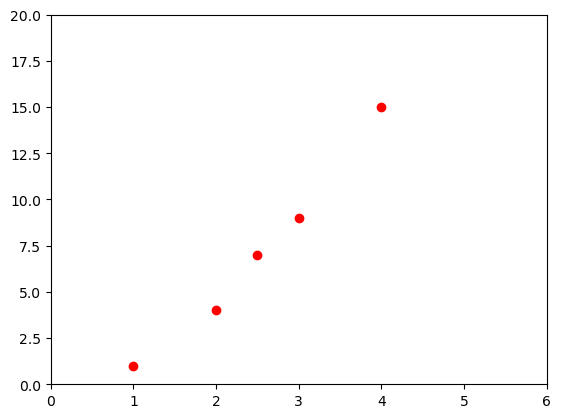

In [2]:

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.axis([0, 6, 0, 20])

We can see that this data has a linear coorespondence. When the x value increases, so does the y. Because of this relation we can create a line of best fit for this dataset. In this example our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will have more features and inputs.

"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points." (https://www.investopedia.com/terms/l/line-of-best-fit.asp)

Here's a refresher on the equation of a line in 2D.

$ y = mx + b $

Here's an example of a line of best fit for this graph.



new_x: [1.  2.  2.5 3.  4. ]
new_y: [ 0.15  4.85  7.2   9.55 14.25]


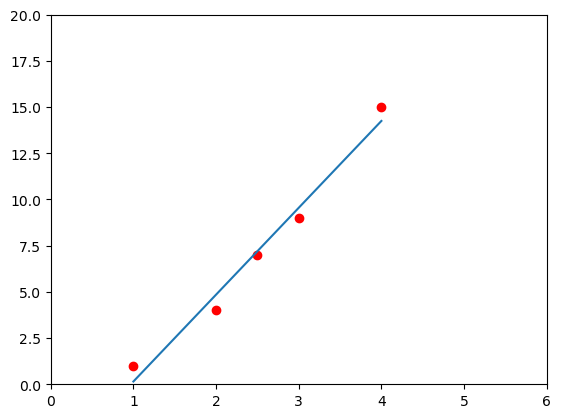

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'ro') # ro：red points
ax.axis([0, 6, 0, 20])
new_x = np.unique(x) # unique() returns unique values
new_y = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
print(f"new_x: " + str(new_x))
print("new_y: " + str(new_y))
ax.plot(new_x, new_y)
plt.show()

Once we've generated this line for our dataset, we can use its equation to predict future values. We just pass the features of the data point we would like to predict into the equation of the line and use the output as our prediction.

### Data
So, if you haven't realized by now a major part of machine learning is data! In fact, it's so important that most of what we do in this tutorial will focus on exploring, cleaning and selecting appropriate data.

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. Our first step is always to understand the data and explore it. So, let's do that!

**Below we will load a dataset and learn how we can explore it using some built-in tools.**



In [4]:
# Load dataset.
# data from:
# https://storage.googleapis.com/tf-datasets/titanic/train.csv
# https://storage.googleapis.com/tf-datasets/titanic/eval.csv

dftrain = pd.read_csv('./data/titanic/train.csv') # training data
dfeval = pd.read_csv('./data/titanic/eval.csv') # testing data
dftrain.head()

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


The ```pd.read_csv()``` method will return to us a new pandas *dataframe*. You can think of a dataframe like a table. In fact, we can actually have a look at the table representation.

We've decided to pop the "survived" column from our dataset and store it in a new variable. This column simply tells us if the person survived our not.

To look at the data we'll use the ```.head()``` method from pandas. This will show us the first 5 items in our dataframe.

In [5]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


And if we want a more statistical analysis of our data we can use the ```.describe()``` method.

In [6]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


And since we talked so much about shapes in the previous tutorial let's have a look at that too!

In [7]:
dftrain.shape

(627, 9)

So have have 627 entries and 9 features, nice!

Now let's have a look at our survival information.

In [8]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Notice that each entry is either a 0 or 1. Can you guess which stands for survival?

**And now because visuals are always valuable let's generate a few graphs of the data.**

<Axes: >

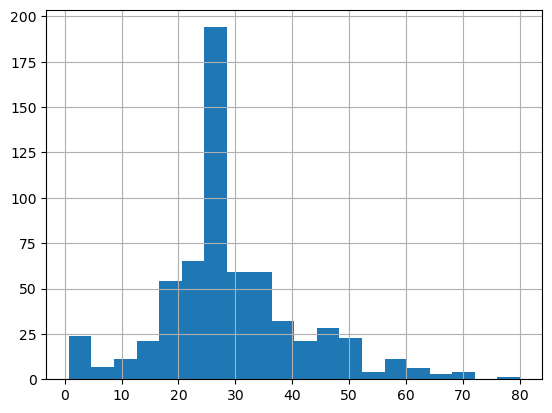

In [9]:
dftrain.age.hist(bins=20) # bins is the number of bins, or groups, that we want to make

<Axes: ylabel='sex'>

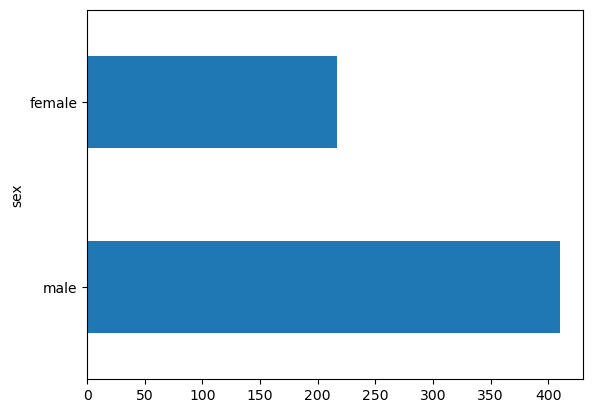

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

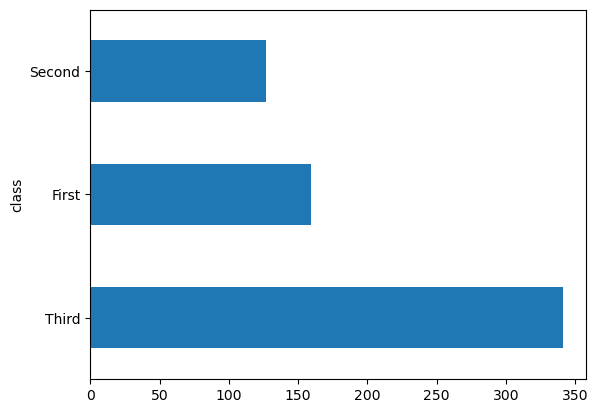

In [11]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

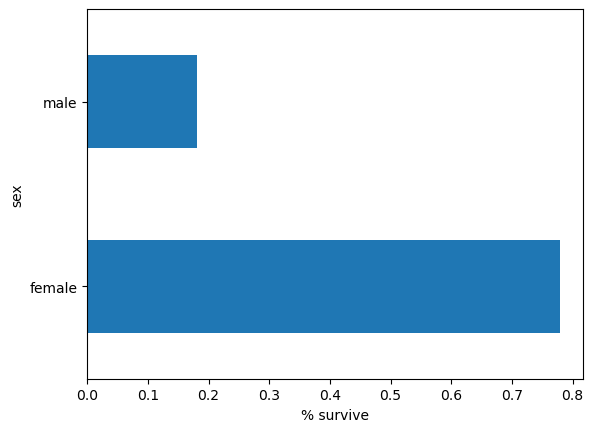

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('sex')['survived'].mean().plot(kind='barh').set_xlabel('% survive')

After analyzing this information, we should notice the following:
- Most passengers are in their 20's or 30's
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival

### Training vs Testing Data
You may have noticed that we loaded **two different datasets** above. This is because when we train models, we need two sets of data: **training and testing**.

The **training** data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The **testing** data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.



### data Pre-processing


In [13]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']


# trans all col to str type
for col in CATEGORICAL_COLUMNS:
    dftrain[col] = dftrain[col].astype(str)
    dfeval[col] = dfeval[col].astype(str)

# Make Input Pipeline
# pandas DataFrame --> tf.data.Dataset
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
    # df --> dict
    dataframe = dataframe.copy()
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

# create dataset
BATCH_SIZE = 32
train_ds = df_to_dataset(dftrain, y_train, batch_size=BATCH_SIZE)
eval_ds = df_to_dataset(dfeval, y_eval, shuffle=False, batch_size=BATCH_SIZE)

# Keras pre process
feature_inputs = []
encoded_features = []

# create Input and Normalization
for feature_name in NUMERIC_COLUMNS:
    # input
    input_layer = tf.keras.Input(shape=(1,), name=feature_name, dtype=tf.float32)
    feature_inputs.append(input_layer)

    # normalizer
    normalizer = tf.keras.layers.Normalization(axis=None)

    normalizer.adapt(dftrain[feature_name].to_numpy().reshape(-1, 1))

    encoded = normalizer(input_layer)
    encoded_features.append(encoded)

# create Input, StringLookup and CategoryEncoding
for feature_name in CATEGORICAL_COLUMNS:
    # input
    input_layer = tf.keras.Input(shape=(1,), name=feature_name, dtype=tf.string)
    feature_inputs.append(input_layer)

    # search vocab
    vocab = dftrain[feature_name].unique()
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')

    # application
    encoded = lookup(input_layer)
    encoded_features.append(encoded)

# feature_inputs
encoded_features

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 8), dtype=float32, sparse=False, ragged=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 9), dtype=float32, sparse=False, ragged=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>]

### Create Model and Training


In [14]:
# concatenate features
all_features = tf.keras.layers.concatenate(encoded_features)

# define output layer
output = tf.keras.layers.Dense(1, activation='sigmoid')(all_features)

# create model
linear_est = tf.keras.Model(inputs=feature_inputs, outputs=output)

# compile model
linear_est.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# if regression, usually use 'mse' and 'mae'
# linear_est.compile(optimizer='adam',
#                    loss='mse',
#                    metrics=['mae'])


### Training the Model
Training the model is as easy as passing the input functions that we created earlier.

In [15]:
# train model
NUM_EPOCHS = 10
linear_est.fit(train_ds, epochs=NUM_EPOCHS)

result = linear_est.evaluate(eval_ds)

print(f"Accuracy: {result[1]:.2%}")

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3027 - loss: 0.8515   
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3314 - loss: 0.8312 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3569 - loss: 0.8072 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4821 - loss: 0.7697 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5335 - loss: 0.7618 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5492 - loss: 0.7508 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6134 - loss: 0.7181 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6298 - loss: 0.6976 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6154 - loss: 0.6879 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5989 - loss: 0.6900 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6094 - loss: 0.6605  
Accuracy: 62.88%


And we now we have a model with a 74% accuracy (this will change each time)! Not crazy impressive but decent for our first try.

Now let's see how we can actually use this model to make predictions.

We can use the ```.predict()``` method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

As you can see the survival rate is not very high :/

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.36532888],
       [0.45257363],
       [0.535198  ],
       [0.4620615 ],
       [0.48115453],
       [0.2914678 ],
       [0.3634231 ],
       [0.34109128],
       [0.3041889 ],
       [0.29788214],
       [0.31244496],
       [0.3412939 ],
       [0.4161009 ],
       [0.30195165],
       [0.542866  ],
       [0.29125243],
       [0.3362071 ],
       [0.3964525 ],
       [0.36609975],
       [0.3548491 ],
       [0.33954796],
       [0.39387324],
       [0.33321726],
       [0.37074745],
       [0.35190025],
       [0.28542298],
       [0.34205416],
       [0.4073651 ],
       [0.3154451 ],
       [0.49193272],
       [0.3313854 ],
       [0.42878687],
       [0.41776294],
       [0.35386285],
       [0.45812467],
       [0.35159495],
       [0.5671998 ],
       [0.44939974],
       [0.45564154],
       [0.35658643],
       [0.4341716 ],
       [0.3244333 ],
       [0.41896698],
       [0.33258128],
       [0.5763382 ],
       [0.36293644],
       [0.34119257],
       [0.400

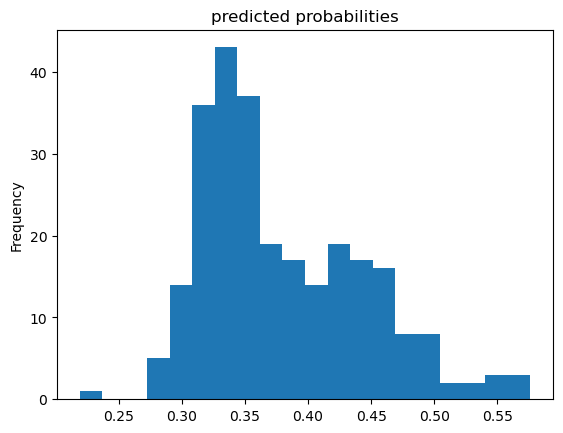

In [16]:
pred = linear_est.predict(eval_ds)

probs = pd.Series(pred.flatten())

probs.plot(kind='hist', bins=20, title='predicted probabilities')

pred

## Classification
Now that we've covered linear regression it is time to talk about classification. Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

Since we've touched on how estimators work earlier, I'll go a bit quicker through this example.

This section is based on the following guide from the TensorFlow website.
https://www.tensorflow.org/tutorials/estimator/premade

**this code will turn to tensorflow 2.0+**




### Dataset
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [17]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [18]:
# data from
# "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
# "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
train_path = "./data/iris/iris_training.csv"
test_path = "./data/iris/iris_test.csv"

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

Let's have a look at our data.

In [19]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Now we can pop the species column off and use that as our label.

In [20]:
train_features = train.copy()
train_labels = train_features.pop('Species')

test_features = test.copy()
test_labels = test_features.pop('Species')

train_features.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [21]:
train_features.shape  # we have 120 entires with 4 features



(120, 4)

### Create Model

In [22]:
# sequential model
model = keras.Sequential([
    # auto-input layer
    keras.layers.InputLayer(input_shape=(len(train_features.columns),) ),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

d:\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Model Compile

In [23]:
#
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

### Training
Now it's time to train the model!

In [25]:
history = model.fit(train_features, train_labels,
                    epochs=100,    # 训练轮次
                    batch_size=32, # 批次大小
                    verbose=1)     # 不显示训练过程的详细输出，只在最后打印结果

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3733 - loss: 1.1581  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3640 - loss: 1.1510 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3129 - loss: 1.1845 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3317 - loss: 1.1325 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3515 - loss: 1.0916 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3608 - loss: 1.0530 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3421 - loss: 1.0627 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3358 - loss: 1.0441 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3525 - loss: 1.0087 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3858 - loss: 0.9608 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3506 - loss: 0.9932 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3735 - lo

The only thing to explain here is the **steps** argument. This simply tells the classifier to run for 5000 steps. Try modifiying this and seeing if your results change. Keep in mind that more is not always better.

### Evaluation
Now let's see how this trained model does!

In [26]:
loss, accuracy = model.evaluate(test_features, test_labels, verbose=0)
print(f"test Accuracy): {accuracy:.2%}")

test Accuracy): 96.67%


### Predictions
Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [27]:
# 假设 SPECIES 已定义
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

def predict_fn(features_df, batch_size=1):
    # 直接从DataFrame转换为张量，而不是先转为字典
    return tf.data.Dataset.from_tensor_slices(features_df.values).batch(batch_size)

features_to_predict = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# 示例输入数据
predict_data = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}
expected = ['Setosa', 'Versicolor', 'Virginica']

predict_df = pd.DataFrame(predict_data)

# 确保DataFrame列的顺序与训练时一致
predict_df = predict_df[features_to_predict]

# 进行预测
predictions = model.predict(predict_fn(predict_df), verbose=0)

print("\nresult:")
for i, prediction_probs in enumerate(predictions): 
    # 对于多分类，使用argmax获取最大概率的类别索引
    class_id = tf.argmax(prediction_probs).numpy()
    probability = prediction_probs[class_id]
    
    print('预测结果: "{}" (概率: {:.1f}%)，预期: "{}"'.format(
        SPECIES[class_id], 100 * probability, expected[i]))


result:
预测结果: "Setosa" (概率: 96.8%)，预期: "Setosa"
预测结果: "Versicolor" (概率: 73.1%)，预期: "Versicolor"
预测结果: "Virginica" (概率: 66.7%)，预期: "Virginica"


And that's pretty much it for classification!

## Clustering
Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

K-Means is one of the most common unsupervised learning algorithms that clusters data based on their features.
We can use sklearn.cluster.KMeans to implement K-Means.

#### Basic Algorithm for K-Means.
- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

*Please refer to the video for an explanation of KMeans clustering.*

## Hidden Markov Models

"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

*This section is based on the following TensorFlow tutorial.* https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

### Data
Let's start by discussing the type of data we use when we work with a hidden markov model.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

**States:** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: *On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: *a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.*

To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

when import tfp, some warning message will be shown, but it can be ignored, it is related to the version of tensorflow or keras.
this moudle some where maybe used some outdated version of tensorflow.

In [47]:
import tensorflow_probability as tfp

### Weather Model
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is
 normally distributed with mean and standard deviation 0 and 5 on
 a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with **standard deviation** it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.


In [48]:
tfd = tfp.distributions  # making a shortcut for later on

initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above

transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

We've now created distribution variables to model our system and it's time to create the hidden markov model.

In [49]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the **expected temperatures** on each day we can do the following.

In [50]:
mean = model.mean()

print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724698 10.71741  10.715222]


## Conclusion
So that's it for the core learning algorithms in TensorFlow. Hopefully you've learned about a few interesting tools that are easy to use! To practice I'd encourage you to try out some of these algorithms on different datasets.

## Sources

1. Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
2. “Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
3. “Build a Linear Model with Estimators &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
4. Staff, EasyBib. “The Free Automatic Bibliography Composer.” EasyBib, Chegg, 1 Jan. 2020, www.easybib.com/project/style/mla8?id=1582473656_5e52a1b8c84d52.80301186.
5. Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 14 Sept. 2019, https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
6. Definition of Hidden Markov Model, http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html.
7. “Tfp.distributions.HiddenMarkovModel &nbsp;: &nbsp; TensorFlow Probability.” TensorFlow, www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel.